In [356]:
import sys
import pandas as pd
import mysql.connector
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

mydb = mysql.connector.connect(
  host="172.28.200.50",
  user="root",
  passwd="insert-password-here",
  database="iiwari_org")


mycursor = mydb.cursor(dictionary=True)
mycursor.execute("SELECT node_id, timestamp, x,y,z,q FROM SensorData LIMIT 500000 ;" );
df = pd.DataFrame(mycursor.fetchall())
df


node_id                            timestamp     x  \
0       b'-2393099149039893833'  b'2020-06-24 12:20:08.533016+00:00'  2762   
1       b'-2393099149039893833'  b'2020-06-24 12:20:08.620015+00:00'  2870   
2       b'-2393099149039893833'  b'2020-06-24 12:20:09.622827+00:00'  2916   
3       b'-2393099149039893833'  b'2020-06-24 12:20:09.622846+00:00'  2894   
4       b'-2393099149039893833'  b'2020-06-24 12:20:10.116102+00:00'  2888   
...                         ...                                  ...   ...   
499995  b'-2393099149039893833'  b'2020-10-10 10:53:36.062033+00:00'  1787   
499996  b'-2393099149039893833'  b'2020-10-10 10:53:42.062113+00:00'  1785   
499997  b'-2393099149039893833'   b'2020-10-10 10:53:43.06189+00:00'  1785   
499998  b'-2393099149039893833'  b'2020-10-10 10:53:44.062039+00:00'  1779   
499999  b'-2393099149039893833'  b'2020-10-10 10:53:45.061934+00:00'  1785   

          y    z  q  
0      -257  100  0  
1      -344  100  0  
2      -344  100  0  
3      -254  100  0  
4      -188  100  0  
...     ...  ... ..  
499995 -178  100  0  
499996 -203  100  0  
499997 -210  100  0  
499998 -219  100  0  
499999 -204  100  0  

[500000 rows x 6 columns]

In [357]:
df['timestamp'] = df['timestamp'].astype('str')
df['timestamp'] = df['timestamp'].astype('string')
df['timestamp'] = df['timestamp'].str.lstrip("b'")
df['timestamp'] = df['timestamp'].str.rstrip("'+00:00'")
df['timestamp'] = df['timestamp'].astype('datetime64[s]')

    # #Lisätään UTC-timezone takaisin
df.timestamp = df.timestamp.dt.tz_localize('UTC')

    # Muunnetaan Suomen aikaan. Tämä huomioi kesä- ja talviajan.
df.timestamp = df.timestamp.dt.tz_convert('Europe/Helsinki')

df['node_id'] = pd.factorize(df['node_id'])[0] + 1 #Muutetaan node_id:t kivempiin lukuihin

df

node_id                 timestamp     x    y    z  q
0             1 2020-06-24 15:20:08+03:00  2762 -257  100  0
1             1 2020-06-24 15:20:08+03:00  2870 -344  100  0
2             1 2020-06-24 15:20:09+03:00  2916 -344  100  0
3             1 2020-06-24 15:20:09+03:00  2894 -254  100  0
4             1 2020-06-24 15:20:10+03:00  2888 -188  100  0
...         ...                       ...   ...  ...  ... ..
499995        1 2020-10-10 13:53:36+03:00  1787 -178  100  0
499996        1 2020-10-10 13:53:42+03:00  1785 -203  100  0
499997        1 2020-10-10 13:53:43+03:00  1785 -210  100  0
499998        1 2020-10-10 13:53:44+03:00  1779 -219  100  0
499999        1 2020-10-10 13:53:45+03:00  1785 -204  100  0

[500000 rows x 6 columns]

In [358]:
df['viikonpäivä'] = df['timestamp'].dt.day_name()


In [359]:
df.head(243)

node_id                 timestamp     x    y    z  q viikonpäivä
0          1 2020-06-24 15:20:08+03:00  2762 -257  100  0   Wednesday
1          1 2020-06-24 15:20:08+03:00  2870 -344  100  0   Wednesday
2          1 2020-06-24 15:20:09+03:00  2916 -344  100  0   Wednesday
3          1 2020-06-24 15:20:09+03:00  2894 -254  100  0   Wednesday
4          1 2020-06-24 15:20:10+03:00  2888 -188  100  0   Wednesday
..       ...                       ...   ...  ...  ... ..         ...
238        1 2020-06-24 15:33:03+03:00  2932 -132  100  0   Wednesday
239        1 2020-06-24 15:33:05+03:00  2935 -309  100  0   Wednesday
240        1 2020-06-24 15:33:06+03:00  2896 -308  100  0   Wednesday
241        1 2020-06-24 15:33:06+03:00  2886 -347  100  0   Wednesday
242        1 2020-06-25 07:51:52+03:00  1264 -643  100  0    Thursday

[243 rows x 7 columns]

In [360]:
df.tail(3400)

node_id                 timestamp     x    y    z  q viikonpäivä
496600        1 2020-10-10 08:23:02+03:00  2783 -331  100  0    Saturday
496601        1 2020-10-10 08:23:21+03:00  2773 -338  100  0    Saturday
496602        1 2020-10-10 08:23:40+03:00  2772 -339  100  0    Saturday
496603        1 2020-10-10 08:23:50+03:00  2773 -337  100  0    Saturday
496604        1 2020-10-10 08:24:09+03:00  2772 -337  100  0    Saturday
...         ...                       ...   ...  ...  ... ..         ...
499995        1 2020-10-10 13:53:36+03:00  1787 -178  100  0    Saturday
499996        1 2020-10-10 13:53:42+03:00  1785 -203  100  0    Saturday
499997        1 2020-10-10 13:53:43+03:00  1785 -210  100  0    Saturday
499998        1 2020-10-10 13:53:44+03:00  1779 -219  100  0    Saturday
499999        1 2020-10-10 13:53:45+03:00  1785 -204  100  0    Saturday

[3400 rows x 7 columns]

In [361]:
class karry:
    def __init__(self, ajokerta):
        self.ajokerta = ajokerta
        self.node_id = []
        self.timestamp = []
        self.x = []
        self.y = []

    def lisaa(self, node_id, timestamp, x, y):
        self.node_id.append(node_id)
        self.timestamp.append(timestamp)
        self.x.append(x)
        self.y.append(y)
karrylista = []      #tähän tallennetaan kärryt
ajokerta = 0   # pidetään kirjaa kuinka monta kertaa kärry on ajanut kaupan läpi. Käytetään Kärryjen etsimiseen ja erotteluun
Karry = karry(ajokerta)      #luodaan karry
karrylista.append(Karry)     #lisätään ensimmäinen karry listaan, koska data alkaa yleensä kesken ajokerran
# Tarvitaan dataframe!
for i in range(len(df)-1): # -1 koska lasketaan seuraava rivi - nykyinen rivi 
    erotus = str(df.timestamp[i+1] - df.timestamp[i]) # lasketaan seuraavan rivin ja nykyisen rivin aika-erotus
    if erotus < "0 days 00:01:00":
        karrylista[ajokerta].lisaa(df.node_id[i], df.timestamp[i],df.x[i], df.y[i]) 
    else: #Luodaan uusi karry, jos erotus on ylittää annetun arvon 
        ajokerta += 1   #seuraaava ajokerta
        Karry = karry(ajokerta)      #luodaan uusi karry
        karrylista.append(Karry)     #Lisätään Kärry listaan

In [362]:
alo = []
lapimenoajat = [] #Luodaan pari uutta listaa

for i in range(len(karrylista)):
    if len(karrylista[i].node_id) > 100:
        
        alotus = karrylista[i].timestamp[0]
        lopetus = karrylista[i].timestamp[-1]
        lapimenoaika = (lopetus - alotus)
        alo.append(alotus)
        lapimenoajat.append(lapimenoaika)  #For looppi missä saadaan luotua läpimenoajat kärryille
        
alotukset = {"Aloitus":alo }
Lapimenot = {"Lapimenoajat":lapimenoajat}  #Tallennetaan aloitusajat sekä läpimenoajat listoihin

print("Läpimenoajat", lapimenoajat)        

Läpimenoajat [Timedelta('0 days 00:12:58'), Timedelta('0 days 00:16:42'), Timedelta('0 days 01:47:22'), Timedelta('0 days 00:58:38'), Timedelta('0 days 00:27:43'), Timedelta('0 days 01:59:35'), Timedelta('0 days 00:34:20'), Timedelta('0 days 04:45:00'), Timedelta('0 days 01:35:30'), Timedelta('0 days 00:12:42'), Timedelta('0 days 00:50:19'), Timedelta('0 days 00:10:36'), Timedelta('0 days 00:44:00'), Timedelta('0 days 00:12:12'), Timedelta('0 days 02:16:42'), Timedelta('0 days 00:34:44'), Timedelta('0 days 00:12:25'), Timedelta('0 days 00:19:37'), Timedelta('0 days 00:30:44'), Timedelta('0 days 00:27:02'), Timedelta('0 days 00:22:11'), Timedelta('0 days 00:35:48'), Timedelta('0 days 00:23:42'), Timedelta('0 days 01:39:27'), Timedelta('0 days 01:24:39'), Timedelta('0 days 00:14:57'), Timedelta('0 days 00:14:29'), Timedelta('0 days 00:24:56'), Timedelta('0 days 00:05:42'), Timedelta('0 days 00:18:43'), Timedelta('0 days 05:48:31'), Timedelta('0 days 00:34:45'), Timedelta('0 days 01:23:23

In [382]:
df2 = pd.DataFrame(alotukset)
df2["Kesto"] = pd.DataFrame(lapimenoajat) #Luodaan uusi dataframe johon tallennetaan aloitusajat sekä läpimenoajat


In [364]:
df2['h'] = df2['Aloitus'].dt.strftime('%H').astype('float')  #Muutetaan aloitusaikojen muoto tunteihin niin ne on helpommin käytettävissä myöhemmin

df2

Aloitus    Kesto     h
0   2020-06-24 15:20:08+03:00 00:12:58  15.0
1   2020-06-25 07:51:52+03:00 00:16:42   7.0
2   2020-06-25 09:17:23+03:00 01:47:22   9.0
3   2020-06-25 12:25:04+03:00 00:58:38  12.0
4   2020-06-25 15:21:24+03:00 00:27:43  15.0
..                        ...      ...   ...
664 2020-10-09 18:29:00+03:00 00:06:23  18.0
665 2020-10-09 19:00:41+03:00 00:26:48  19.0
666 2020-10-09 19:53:35+03:00 01:21:09  19.0
667 2020-10-10 05:50:18+03:00 07:49:48   5.0
668 2020-10-10 13:45:00+03:00 00:08:44  13.0

[669 rows x 3 columns]

In [365]:
df2_aika = [8, 11, 13, 15, 17, 19, 21]
df2_ajat = pd.cut(df2['h'], df2_aika)  #Tehdään ajat bin johon tallennetaan tunnit ja näin HUOM! pitäisi pystyä laittamaan läpimenoajat eri tunti-ikkunoitten sisään
keskiarvot = (df2.groupby (df2_ajat)["Kesto"].count() / len(df2['Kesto'])) * 60 #Lasketaan keskiarvot aikaikkunoitten sisällä sekä muutetaan saadut luvut minuuteiksi
keskiarvot=(round(keskiarvot)) #Pyöristetään saadut luvut
keskiarvot

h
(8, 11]      7.0
(11, 13]     8.0
(13, 15]    10.0
(15, 17]    11.0
(17, 19]    13.0
(19, 21]     5.0
Name: Kesto, dtype: float64

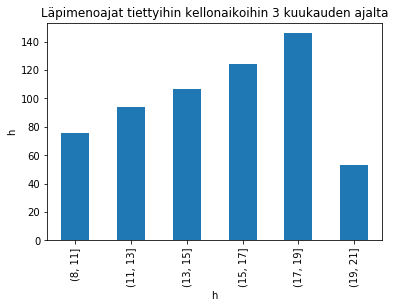

In [381]:
plot_df2 = df2.groupby (df2_ajat)["Kesto"].count()

plt.ylabel("h")
plt.title("Läpimenoajat tiettyihin kellonaikoihin 3 kuukauden ajalta")
plot_df2.plot(kind = 'bar');  #Ensimmäinen plottaus joka osoittaa df2_ajat binin toimivuuden näyttämällä kaikki läpimenoajat yhteensä tuntihaarukoitten sisällä

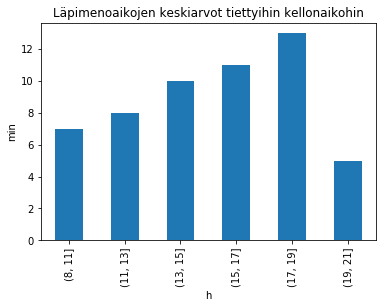

In [367]:
plot_df_keskiarvo = (keskiarvot)

plt.ylabel("min")
plt.title("Läpimenoaikojen keskiarvot tiettyihin kellonaikohin")
plot_df_keskiarvo.plot(kind = 'bar'); #Toinen plottaus jossa näkyy keskiarvo kaupassa vietetystä ajasta minuutteina

In [373]:
df2['viikonpäivä'] = df2['Aloitus'].apply(lambda x: x.weekday())
df2['viikonpäivä'] = df2['Aloitus'].dt.day_name()
sorter = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df2['viikonpäivä'] = pd.Categorical(df2['viikonpäivä'], categories=sorter, ordered=True)
df2 = df2.sort_values('viikonpäivä')

df2  #Otetaan talteen viikonpäivät sekä järjestellään ne maanantaista sunnuntaihin

Aloitus    Kesto     h viikonpäivä  day_id
191 2020-07-20 11:28:00+03:00 00:07:02  11.0      Monday     NaN
371 2020-08-24 17:31:12+03:00 01:45:35  17.0      Monday     NaN
559 2020-09-21 19:22:49+03:00 00:56:40  19.0      Monday     NaN
420 2020-08-31 16:35:59+03:00 02:43:01  16.0      Monday     NaN
14  2020-06-29 12:21:03+03:00 02:16:42  12.0      Monday     NaN
..                        ...      ...   ...         ...     ...
409 2020-08-30 15:22:55+03:00 00:28:01  15.0      Sunday     NaN
410 2020-08-30 15:53:20+03:00 01:08:37  15.0      Sunday     NaN
235 2020-07-26 12:17:52+03:00 00:07:52  12.0      Sunday     NaN
120 2020-07-12 10:14:02+03:00 01:08:24  10.0      Sunday     NaN
121 2020-07-12 11:45:45+03:00 01:08:35  11.0      Sunday     NaN

[669 rows x 5 columns]

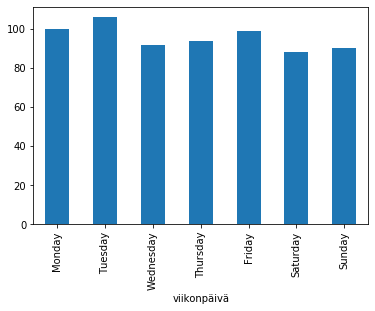

In [374]:
päivät = df2['viikonpäivä']
#df2_päivät = pd.cut(df2["h"], päivät)
plot_viikonpäivä = df2.groupby(päivät)["Kesto"].count()

plt.title("")
plot_viikonpäivä.plot(kind = 'bar'); # Plotataan kokonaisaikoina kaupoissa kunakin päivänä vietetyt ajat.

In [379]:
keskiarvot_pv = (df2.groupby (päivät)["Kesto"].count() / len(df2['Kesto'])) * 60
keskiarvot_pv=(round(keskiarvot_pv))
keskiarvot_pv # Lasketaan taas keskiarvot joka päivälle

viikonpäivä
Monday        9.0
Tuesday      10.0
Wednesday     8.0
Thursday      8.0
Friday        9.0
Saturday      8.0
Sunday        8.0
Name: Kesto, dtype: float64

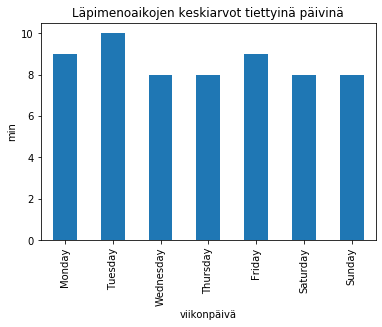

In [380]:
plot_df_keskiarvo_pv = (keskiarvot_pv)

plt.ylabel("min")
plt.title("Läpimenoaikojen keskiarvot tiettyinä päivinä")
plot_df_keskiarvo_pv.plot(kind = 'bar'); # Plotataan keskiarvot. Tästä näemme että keskimäärin eniten kaupassa ollaan tiistaisin ja toisiksi eniten perjantaisin.